In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 读取数据
data = pd.read_csv("Dry_Bean_Dataset.csv")

# 假设最后一列为目标变量，其余为特征
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化 Logistic Regression 模型
model = LogisticRegression(max_iter=1000)

# 训练模型
model.fit(X_train, y_train)

# 预测训练集和测试集结果
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# 输出结果
print("训练集准确率:", accuracy_score(y_train, train_predictions))
print("测试集准确率:", accuracy_score(y_test, test_predictions))
print("\n测试集分类报告:\n", classification_report(y_test, test_predictions))

训练集准确率: 0.8600818725726882
测试集准确率: 0.8633692458374143

测试集分类报告:
               precision    recall  f1-score   support

    BARBUNYA       0.91      0.78      0.84       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.86      0.93      0.90       479
    DERMASON       0.85      0.88      0.87      1043
       HOROZ       0.91      0.89      0.90       588
       SEKER       0.85      0.79      0.82       619
        SIRA       0.80      0.84      0.82       799

    accuracy                           0.86      4084
   macro avg       0.89      0.87      0.88      4084
weighted avg       0.86      0.86      0.86      4084



c:\Users\angel\.conda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


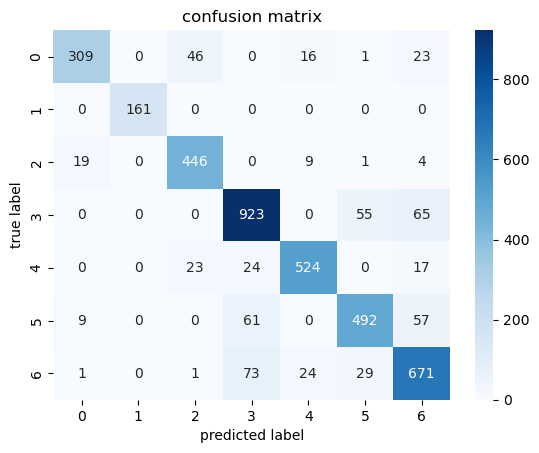

In [7]:
import matplotlib.pyplot as plt  # 新增导入
import seaborn as sns  # 新增导入
from sklearn.metrics import confusion_matrix  # 新增导入


# 绘制混淆矩阵
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('confusion matrix')
plt.show()
# ...existing code...

Epoch 0, Loss: 1.9459101490553143
Epoch 100, Loss: 0.561967517995186
Epoch 200, Loss: 0.4268659394762434
Epoch 300, Loss: 0.3674252827694314
Epoch 400, Loss: 0.3339403731605768
Epoch 500, Loss: 0.3124228874395389
Epoch 600, Loss: 0.29739678068224895
Epoch 700, Loss: 0.2862896735875526
Epoch 800, Loss: 0.2777348790754874
Epoch 900, Loss: 0.27093816102814416
Epoch 1000, Loss: 0.2654055703475441
Epoch 1100, Loss: 0.2608132666340011
Epoch 1200, Loss: 0.2569398075496189
Epoch 1300, Loss: 0.2536284846225405
Epoch 1400, Loss: 0.2507651942392578
Epoch 1500, Loss: 0.248264833096282
Epoch 1600, Loss: 0.2460626092582229
Epoch 1700, Loss: 0.2441083093864996
Epoch 1800, Loss: 0.24236240888725716
Epoch 1900, Loss: 0.24079336731247103
Epoch 2000, Loss: 0.23937570708497755
Epoch 2100, Loss: 0.23808862249267862
Epoch 2200, Loss: 0.2369149553822919
Epoch 2300, Loss: 0.2358404293188764
Epoch 2400, Loss: 0.23485306907385736
Epoch 2500, Loss: 0.23394275507627618
Epoch 2600, Loss: 0.23310087754406458
Epoch 

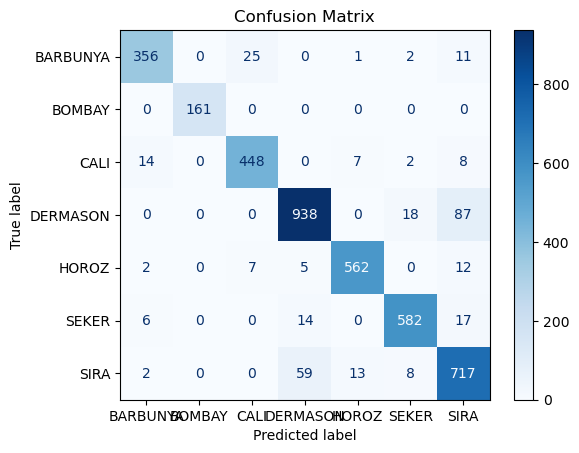

In [11]:
#without adding or deleting any features

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)])
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model
def train_logistic_regression(X, y, num_classes, lr=0.1, epochs=3000):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))  # Initialize weights
    b = np.zeros(num_classes)               # Initialize biases

    for epoch in range(epochs):
        # Forward pass
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute loss
        loss = cross_entropy_loss(y, y_pred)

        # Backward pass (compute gradients)
        grad_w, grad_b = compute_gradients(X, y, y_pred)

        # Update weights and biases
        W -= lr * grad_w
        b -= lr * grad_b

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W, b

# Predict function
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Example usage
if __name__ == "__main__":
    # Load your dataset here
    # Assuming the dataset is a CSV file with the last column as the target
    import pandas as pd
    data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
    # data = shuffle(data, random_state=42)  # Shuffling the dataset
    # features = list(data.drop(data.columns[-1], axis=1).columns)  # Assuming the last column is the target
    # data["Elongation"] = data["AspectRation"] * (1 - data["roundness"])
    # data["FlatSymmetry"] = data["AspectRation"] * data["Extent"]
    # data["KidneyScore"] = (1 - data["ShapeFactor4"]) * data["EquivDiameter"]
    # data["TextureHint"] = data["Solidity"] * data["Compactness"]
    # all_features = features + ["Elongation", "FlatSymmetry", "KidneyScore", "TextureHint"]

    # target_col = "Class"
    # # 先分离目标变量
    # y = data[target_col]
    # X = data.drop(columns=[target_col])
    # # pd.get_dummies 会将所有非数值型列转换为数值型虚拟变量
    # X = pd.get_dummies(X, drop_first=True)

    # # 现在 X 中的所有特征都是数值型，可以继续归一化处理
    # X = (X - X.mean()) / X.std()

    X = data.iloc[:, :-1].values  # Assuming the last column is the target
    y = data.iloc[:, -1].values
    # Preprocess the data
    # X = data[all_features].values  # 如果目标列不是最后一列，请相应调整
    # y = data.iloc[:, -1].values

    # Normalize features
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # Convert labels to integers (if not already)
    classes = np.unique(y)
    y = np.array([np.where(classes == label)[0][0] for label in y])

    # One-hot encode the labels
    y_encoded = one_hot_encode(y, num_classes=len(classes))

    # Split into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

    # Train the model
    W, b = train_logistic_regression(X_train, y_train, num_classes=len(classes))

    # Test the model
    y_pred = predict(X_test, W, b)
    y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot back to labels
    accuracy = np.mean(y_pred == y_test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # result accuracy improves from around 88% to 92% when increasing the learning rate from 0.01 to 0.1 and adding the epochs from 1000 to 3000

Starting grid search over hyperparameters...

lr: 0.01, epochs: 1000 => Validation Accuracy: 88.41%
lr: 0.01, epochs: 3000 => Validation Accuracy: 93.07%
lr: 0.01, epochs: 5000 => Validation Accuracy: 92.71%
lr: 0.1, epochs: 1000 => Validation Accuracy: 92.97%
lr: 0.1, epochs: 3000 => Validation Accuracy: 93.13%
lr: 0.1, epochs: 5000 => Validation Accuracy: 93.07%
lr: 0.5, epochs: 1000 => Validation Accuracy: 93.07%
lr: 0.5, epochs: 3000 => Validation Accuracy: 92.92%
lr: 0.5, epochs: 5000 => Validation Accuracy: 93.02%

Best hyperparameters on validation set:
Learning Rate: 0.1, Epochs: 3000, Accuracy: 93.13%

Test Accuracy: 92.16%

Confusion Matrix:
[[356   0  25   0   1   2  11]
 [  0 161   0   0   0   0   0]
 [ 14   0 448   0   7   2   8]
 [  0   0   0 938   0  18  87]
 [  2   0   7   5 562   0  12]
 [  6   0   0  14   0 582  17]
 [  2   0   0  59  13   8 717]]


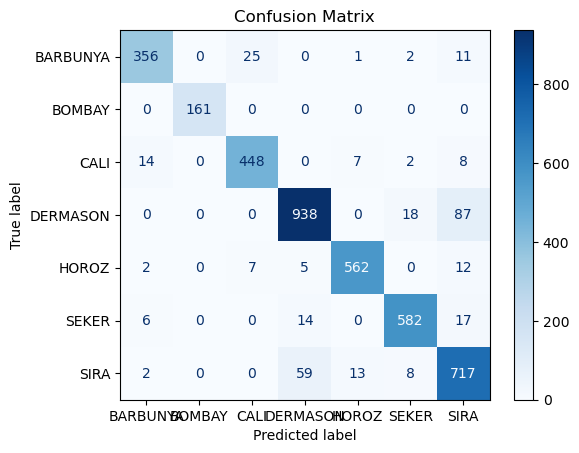

In [ ]:
#added validation set to find the best hyperparameters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)] + 1e-15)
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model given hyperparameters
def train_logistic_regression(X, y, num_classes, lr, epochs):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))  # Initialize weights
    b = np.zeros(num_classes)               # Initialize biases

    for epoch in range(epochs):
        # Forward pass
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute loss
        loss = cross_entropy_loss(y, y_pred)

        # Backward pass (compute gradients)
        grad_w, grad_b = compute_gradients(X, y, y_pred)

        # Update weights and biases
        W -= lr * grad_w
        b -= lr * grad_b

    return W, b

# Predict function
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Load and preprocess the dataset
data = pd.read_csv("Dry_Bean_Dataset.csv")
# Use all features (without adding/deleting any features)
X = data.iloc[:, :-1].values  # Assuming the last column is the target
y = data.iloc[:, -1].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Convert labels to integers (if not already)
classes = np.unique(y)
y = np.array([np.where(classes == label)[0][0] for label in y])

# One-hot encode the labels
y_encoded = one_hot_encode(y, num_classes=len(classes))

# Split into training+validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Hyperparameter grid to search
learning_rates = [0.01, 0.1, 0.5]
epochs_list = [1000, 3000, 5000]

best_val_accuracy = 0
best_params = None
best_W = None
best_b = None

print("Starting grid search over hyperparameters...\n")
for lr in learning_rates:
    for epochs in epochs_list:
        # Train the model on training set
        W, b = train_logistic_regression(X_train, y_train, num_classes=len(classes), lr=lr, epochs=epochs)
        # Evaluate on validation set
        y_val_pred = predict(X_val, W, b)
        y_val_labels = np.argmax(y_val, axis=1)
        accuracy = np.mean(y_val_pred == y_val_labels)
        print(f"lr: {lr}, epochs: {epochs} => Validation Accuracy: {accuracy*100:.2f}%")
        if accuracy > best_val_accuracy:
            best_val_accuracy = accuracy
            best_params = (lr, epochs)
            best_W, best_b = W, b

print("\nBest hyperparameters on validation set:")
print(f"Learning Rate: {best_params[0]}, Epochs: {best_params[1]}, Accuracy: {best_val_accuracy*100:.2f}%")

# Optionally, retrain on full training+validation data using best hyperparameters
W_final, b_final = train_logistic_regression(X_train_val, y_train_val, num_classes=len(classes),
                                               lr=best_params[0], epochs=best_params[1])

# Evaluate on test set
y_test_pred = predict(X_test, W_final, b_final)
y_test_labels = np.argmax(y_test, axis=1)
test_accuracy = np.mean(y_test_pred == y_test_labels)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#evaluate the accuracy of the model on the training, test, and whole dataset

# Evaluate on Training Data
y_train_pred = predict(X_train, W, b)
y_train_labels = np.argmax(y_train, axis=1)
train_accuracy = np.mean(y_train_pred == y_train_labels)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on Test Data
y_test_pred = predict(X_test, W, b)
y_test_labels = np.argmax(y_test, axis=1)
test_accuracy = np.mean(y_test_pred == y_test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Evaluate on the Whole Dataset (Train + Test)
X_whole = np.concatenate((X_train, X_test), axis=0)
y_whole = np.concatenate((y_train, y_test), axis=0)
y_whole_pred = predict(X_whole, W, b)
y_whole_labels = np.argmax(y_whole, axis=1)
whole_accuracy = np.mean(y_whole_pred == y_whole_labels)
print(f"Whole Dataset Accuracy: {whole_accuracy * 100:.2f}%")



Training Accuracy: 92.28%
Test Accuracy: 92.14%
Whole Dataset Accuracy: 92.23%


Accuracy: 92.14%
Precision: 0.93
Recall: 0.93
F1 Score: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       395
           1       1.00      1.00      1.00       161
           2       0.94      0.93      0.93       479
           3       0.93      0.89      0.91      1043
           4       0.97      0.95      0.96       588
           5       0.95      0.94      0.94       619
           6       0.84      0.90      0.87       799

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



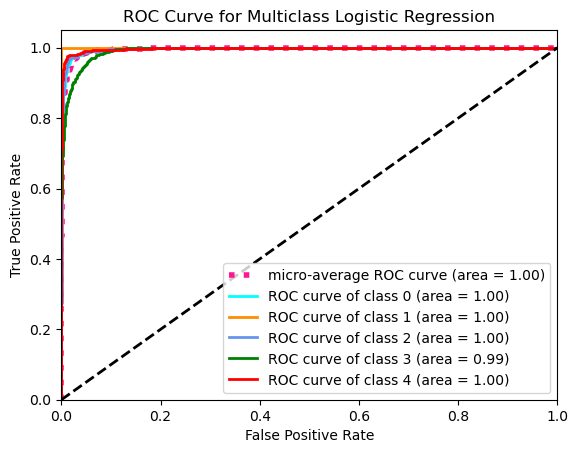

Overall ROC AUC (macro-average): 1.00


In [ ]:
# shows accuracy, precision, recall, F1‐score, and plots ROC curves along with calculating AUC using a one‑vs‑all approach

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_curve, auc, roc_auc_score)
                             
# Define a prediction probability function using softmax
def predict_proba(X, W, b):
    logits = np.dot(X, W) + b
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Get predicted labels and probability estimates
y_pred_labels = predict(X_test, W, b)  # Predicted class labels (integer values)
y_pred_proba = predict_proba(X_test, W, b)  # Predicted probabilities

# Convert one-hot encoded y_test to true labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='macro')
recall = recall_score(y_test_labels, y_pred_labels, average='macro')
f1 = f1_score(y_test_labels, y_pred_labels, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))

# For ROC curves and AUC in multiclass, use one-vs-all approach.
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for the multiclass problem
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']  # adjust colors if >5 classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Calculate overall ROC AUC score (macro-average)
overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro")
print("Overall ROC AUC (macro-average): {:.2f}".format(overall_auc))

Starting grid search over hyperparameters...

Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.2200
Epoch 200, Loss: 0.9932
Epoch 300, Loss: 0.8736
Epoch 400, Loss: 0.7942
Epoch 500, Loss: 0.7352
Epoch 600, Loss: 0.6886
Epoch 700, Loss: 0.6505
Epoch 800, Loss: 0.6185
Epoch 900, Loss: 0.5911
lr: 0.01, epochs: 1000 => Validation Accuracy: 88.41%
Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.2200
Epoch 200, Loss: 0.9932
Epoch 300, Loss: 0.8736
Epoch 400, Loss: 0.7942
Epoch 500, Loss: 0.7352
Epoch 600, Loss: 0.6886
Epoch 700, Loss: 0.6505
Epoch 800, Loss: 0.6185
Epoch 900, Loss: 0.5911
Epoch 1000, Loss: 0.5673
Epoch 1100, Loss: 0.5465
Epoch 1200, Loss: 0.5281
Epoch 1300, Loss: 0.5117
Epoch 1400, Loss: 0.4969
Epoch 1500, Loss: 0.4836
Epoch 1600, Loss: 0.4716
Epoch 1700, Loss: 0.4605
Epoch 1800, Loss: 0.4505
Epoch 1900, Loss: 0.4412
Epoch 2000, Loss: 0.4327
Epoch 2100, Loss: 0.4248
Epoch 2200, Loss: 0.4174
Epoch 2300, Loss: 0.4106
Epoch 2400, Loss: 0.4042
Epoch 2500, Loss: 0.3983
Epoch 2600, Loss: 0.3927

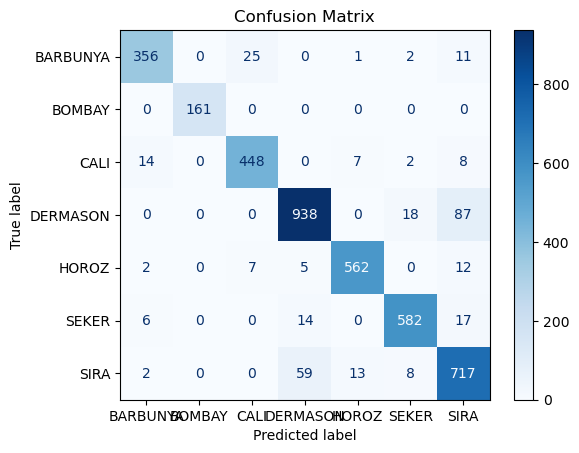

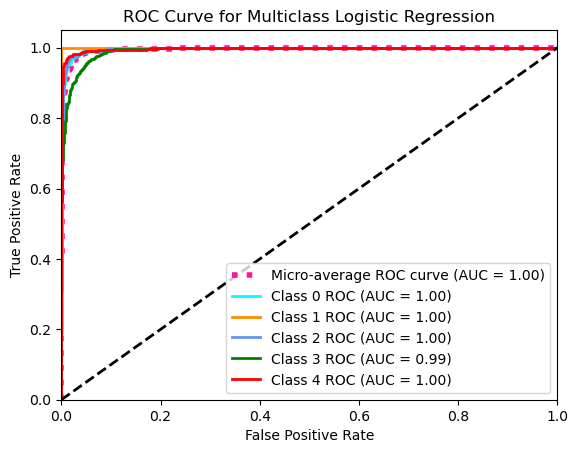

Overall ROC AUC (macro-average): 0.99


In [ ]:
#original + find the best hyperparameters via validation set+ plot ROC curve, confusion matrix, etc+calculate accuracy, precision, recall, f1-score, AUC, etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_curve, auc, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)] + 1e-15)
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model given hyperparameters
def train_logistic_regression(X, y, num_classes, lr, epochs):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))
    b = np.zeros(num_classes)
    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y, y_pred)
        grad_w, grad_b = compute_gradients(X, y, y_pred)
        W -= lr * grad_w
        b -= lr * grad_b
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W, b

# Predict class labels
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Predict probabilities
def predict_proba(X, W, b):
    logits = np.dot(X, W) + b
    return softmax(logits)

# Load and preprocess data
data = pd.read_csv("Dry_Bean_Dataset.csv")
X = data.iloc[:, :-1].values  # features
y = data.iloc[:, -1].values   # target

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Convert labels to integers and one-hot encode them
classes = np.unique(y)
y_int = np.array([np.where(classes == label)[0][0] for label in y])
y_encoded = one_hot_encode(y_int, num_classes=len(classes))

# Split data into training+validation and test sets; further split training+validation into train and validation
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Grid search over hyperparameters
learning_rates = [0.01, 0.1, 0.5]
epochs_list = [1000, 3000, 5000]
best_val_accuracy = 0
best_params = None
best_W = None
best_b = None

print("Starting grid search over hyperparameters...\n")
for lr in learning_rates:
    for epochs in epochs_list:
        W_temp, b_temp = train_logistic_regression(X_train, y_train, num_classes=len(classes), lr=lr, epochs=epochs)
        y_val_pred = predict(X_val, W_temp, b_temp)
        y_val_labels = np.argmax(y_val, axis=1)
        acc = np.mean(y_val_pred == y_val_labels)
        print(f"lr: {lr}, epochs: {epochs} => Validation Accuracy: {acc*100:.2f}%")
        if acc > best_val_accuracy:
            best_val_accuracy = acc
            best_params = (lr, epochs)
            best_W, best_b = W_temp, b_temp

print(f"\nBest hyperparameters: Learning Rate: {best_params[0]}, Epochs: {best_params[1]}, Accuracy: {best_val_accuracy*100:.2f}%")

# Optionally retrain on full training+validation set using the best hyperparameters
W_final, b_final = train_logistic_regression(X_train_val, y_train_val, num_classes=len(classes),
                                               lr=best_params[0], epochs=best_params[1])

# Evaluate model on training, test, and whole datasets using best_W and best_b from grid search
y_train_pred = predict(X_train, best_W, best_b)
train_acc = np.mean(y_train_pred == np.argmax(y_train, axis=1))
print(f"Training Accuracy: {train_acc*100:.2f}%")

y_test_pred = predict(X_test, best_W, best_b)
test_acc = np.mean(y_test_pred == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {test_acc*100:.2f}%")

X_whole = np.concatenate((X_train, X_test), axis=0)
y_whole = np.concatenate((y_train, y_test), axis=0)
whole_acc = np.mean(predict(X_whole, best_W, best_b) == np.argmax(y_whole, axis=1))
print(f"Whole Dataset Accuracy: {whole_acc*100:.2f}%")

# Evaluate classification metrics on test set using retrained model (W_final, b_final)
y_test_pred = predict(X_test, W_final, b_final)
y_test_true = np.argmax(y_test, axis=1)
y_pred_proba = predict_proba(X_test, W_final, b_final)

print("\nClassification Metrics on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_true, y_test_pred)*100))
print("Precision: {:.2f}".format(precision_score(y_test_true, y_test_pred, average='macro')))
print("Recall: {:.2f}".format(recall_score(y_test_true, y_test_pred, average='macro')))
print("F1 Score: {:.2f}".format(f1_score(y_test_true, y_test_pred, average='macro')))
print("\nClassification Report:\n", classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curves (one-vs-all approach) and compute AUC
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc='lower right')
plt.show()

overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro")
print("Overall ROC AUC (macro-average): {:.2f}".format(overall_auc))

Epoch 0, Loss: 1.9459101490553143
Epoch 100, Loss: 0.5264796271899869
Epoch 200, Loss: 0.4019110239322673
Epoch 300, Loss: 0.34760583746696744
Epoch 400, Loss: 0.3170310673581051
Epoch 500, Loss: 0.2973100398542595
Epoch 600, Loss: 0.2834659687153787
Epoch 700, Loss: 0.273176517254578
Epoch 800, Loss: 0.2652101295380711
Epoch 900, Loss: 0.2588504915593089
Epoch 1000, Loss: 0.25365110246828193
Epoch 1100, Loss: 0.24931834868022199
Epoch 1200, Loss: 0.24565078829931555
Epoch 1300, Loss: 0.2425053846111853
Epoch 1400, Loss: 0.23977764847499125
Epoch 1500, Loss: 0.2373894078525277
Epoch 1600, Loss: 0.2352809773647372
Epoch 1700, Loss: 0.2334059776066291
Epoch 1800, Loss: 0.23172780984557798
Epoch 1900, Loss: 0.2302171980977376
Epoch 2000, Loss: 0.2288504385870682
Epoch 2100, Loss: 0.2276081294033495
Epoch 2200, Loss: 0.22647423312178633
Epoch 2300, Loss: 0.22543537468712552
Epoch 2400, Loss: 0.2244803083641429
Epoch 2500, Loss: 0.22359950804922485
Epoch 2600, Loss: 0.22278484884764987
Epoc

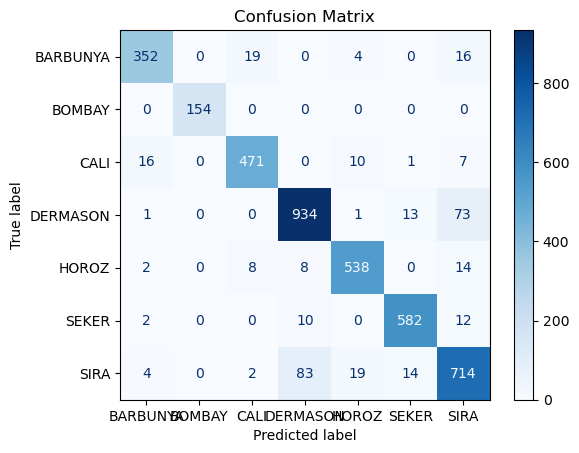

In [10]:
#adding features (with elongation)

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)])
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model
def train_logistic_regression(X, y, num_classes, lr=0.1, epochs=3000):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))  # Initialize weights
    b = np.zeros(num_classes)               # Initialize biases

    for epoch in range(epochs):
        # Forward pass
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute loss
        loss = cross_entropy_loss(y, y_pred)

        # Backward pass (compute gradients)
        grad_w, grad_b = compute_gradients(X, y, y_pred)

        # Update weights and biases
        W -= lr * grad_w
        b -= lr * grad_b

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W, b

# Predict function
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Example usage
if __name__ == "__main__":
    # Load your dataset here
    # Assuming the dataset is a CSV file with the last column as the target
    import pandas as pd
    data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
    data = shuffle(data, random_state=42)  # Shuffling the dataset
    features = list(data.drop(data.columns[-1], axis=1).columns)  # Assuming the last column is the target
    data["Elongation"] = data["AspectRation"] * (1 - data["roundness"])
    data["FlatSymmetry"] = data["AspectRation"] * data["Extent"]
    data["KidneyScore"] = (1 - data["ShapeFactor4"]) * data["EquivDiameter"]
    data["TextureHint"] = data["Solidity"] * data["Compactness"]
    # all_features = features + ["Elongation", "FlatSymmetry", "KidneyScore", "TextureHint"]

    target_col = "Class"
    # 先分离目标变量
    y = data[target_col]
    X = data.drop(columns=[target_col])
    # pd.get_dummies 会将所有非数值型列转换为数值型虚拟变量
    X = pd.get_dummies(X, drop_first=True)

    # 现在 X 中的所有特征都是数值型，可以继续归一化处理
    X = (X - X.mean()) / X.std()

    # X = data.iloc[:, :-1].values  # Assuming the last column is the target
    # y = data.iloc[:, -1].values
    # Preprocess the data
    # X = data[all_features].values  # 如果目标列不是最后一列，请相应调整
    # y = data.iloc[:, -1].values

    # Normalize features
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # Convert labels to integers (if not already)
    classes = np.unique(y)
    y = np.array([np.where(classes == label)[0][0] for label in y])

    # One-hot encode the labels
    y_encoded = one_hot_encode(y, num_classes=len(classes))

    # Split into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

    # Train the model
    W, b = train_logistic_regression(X_train, y_train, num_classes=len(classes))

    # Test the model
    y_pred = predict(X_test, W, b)
    y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot back to labels
    accuracy = np.mean(y_pred == y_test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # result accuracy improves from around 88% to 92% when increasing the learning rate from 0.01 to 0.1 and adding the epochs from 1000 to 3000

Starting grid search over hyperparameters...

Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.1463
Epoch 200, Loss: 0.9313
Epoch 300, Loss: 0.8182
Epoch 400, Loss: 0.7427
Epoch 500, Loss: 0.6866
Epoch 600, Loss: 0.6423
Epoch 700, Loss: 0.6061
Epoch 800, Loss: 0.5758
Epoch 900, Loss: 0.5499
lr: 0.01, epochs: 1000 => Validation Accuracy: 88.46%
Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.1463
Epoch 200, Loss: 0.9313
Epoch 300, Loss: 0.8182
Epoch 400, Loss: 0.7427
Epoch 500, Loss: 0.6866
Epoch 600, Loss: 0.6423
Epoch 700, Loss: 0.6061
Epoch 800, Loss: 0.5758
Epoch 900, Loss: 0.5499
Epoch 1000, Loss: 0.5275
Epoch 1100, Loss: 0.5079
Epoch 1200, Loss: 0.4906
Epoch 1300, Loss: 0.4751
Epoch 1400, Loss: 0.4613
Epoch 1500, Loss: 0.4489
Epoch 1600, Loss: 0.4376
Epoch 1700, Loss: 0.4273
Epoch 1800, Loss: 0.4179
Epoch 1900, Loss: 0.4093
Epoch 2000, Loss: 0.4013
Epoch 2100, Loss: 0.3940
Epoch 2200, Loss: 0.3872
Epoch 2300, Loss: 0.3808
Epoch 2400, Loss: 0.3749
Epoch 2500, Loss: 0.3694
Epoch 2600, Loss: 0.3642

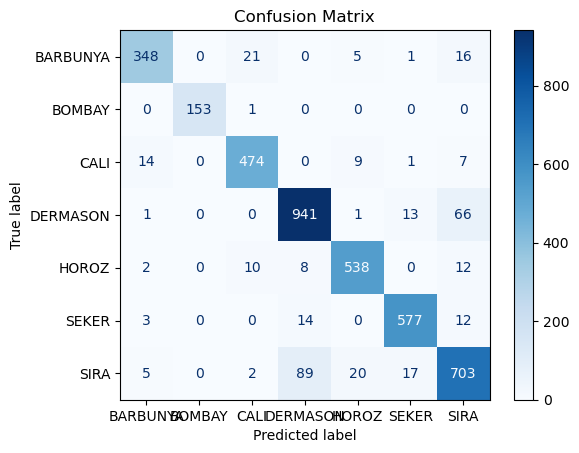

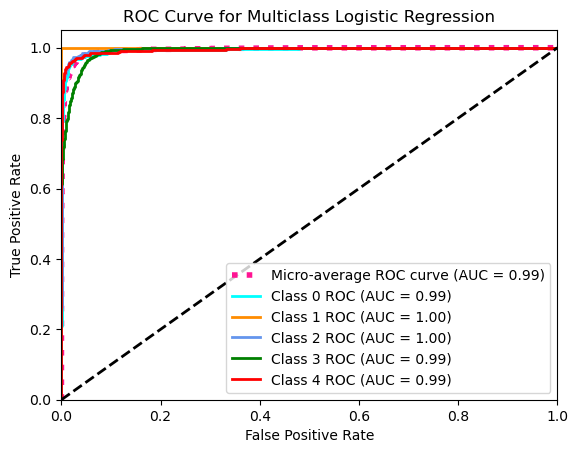

Overall ROC AUC (macro-average): 0.99


In [5]:
#add features(with elongation)  complete version
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_curve, auc, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)] + 1e-15)
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model given hyperparameters
def train_logistic_regression(X, y, num_classes, lr, epochs):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))
    b = np.zeros(num_classes)
    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y, y_pred)
        grad_w, grad_b = compute_gradients(X, y, y_pred)
        W -= lr * grad_w
        b -= lr * grad_b
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W, b

# Predict class labels
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Predict probabilities
def predict_proba(X, W, b):
    logits = np.dot(X, W) + b
    return softmax(logits)

import pandas as pd
data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
data = shuffle(data, random_state=42)  # Shuffling the dataset
features = list(data.drop(data.columns[-1], axis=1).columns)  # Assuming the last column is the target
data["Elongation"] = data["AspectRation"] * (1 - data["roundness"])
data["FlatSymmetry"] = data["AspectRation"] * data["Extent"]
data["KidneyScore"] = (1 - data["ShapeFactor4"]) * data["EquivDiameter"]
data["TextureHint"] = data["Solidity"] * data["Compactness"]
# all_features = features + ["Elongation", "FlatSymmetry", "KidneyScore", "TextureHint"]

target_col = "Class"
# 先分离目标变量
y = data[target_col]
X = data.drop(columns=[target_col])
# pd.get_dummies 会将所有非数值型列转换为数值型虚拟变量
X = pd.get_dummies(X, drop_first=True)

# 现在 X 中的所有特征都是数值型，可以继续归一化处理
X = (X - X.mean()) / X.std()

# X = data.iloc[:, :-1].values  # Assuming the last column is the target
# y = data.iloc[:, -1].values
# Preprocess the data
# X = data[all_features].values  # 如果目标列不是最后一列，请相应调整
# y = data.iloc[:, -1].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)



# Convert labels to integers and one-hot encode them
classes = np.unique(y)
y_int = np.array([np.where(classes == label)[0][0] for label in y])
y_encoded = one_hot_encode(y_int, num_classes=len(classes))

# Split data into training+validation and test sets; further split training+validation into train and validation
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Grid search over hyperparameters
learning_rates = [0.01, 0.1, 0.5]
epochs_list = [1000, 3000, 5000]
best_val_accuracy = 0
best_params = None
best_W = None
best_b = None

print("Starting grid search over hyperparameters...\n")
for lr in learning_rates:
    for epochs in epochs_list:
        W_temp, b_temp = train_logistic_regression(X_train, y_train, num_classes=len(classes), lr=lr, epochs=epochs)
        y_val_pred = predict(X_val, W_temp, b_temp)
        y_val_labels = np.argmax(y_val, axis=1)
        acc = np.mean(y_val_pred == y_val_labels)
        print(f"lr: {lr}, epochs: {epochs} => Validation Accuracy: {acc*100:.2f}%")
        if acc > best_val_accuracy:
            best_val_accuracy = acc
            best_params = (lr, epochs)
            best_W, best_b = W_temp, b_temp

print(f"\nBest hyperparameters: Learning Rate: {best_params[0]}, Epochs: {best_params[1]}, Accuracy: {best_val_accuracy*100:.2f}%")

# Optionally retrain on full training+validation set using the best hyperparameters
W_final, b_final = train_logistic_regression(X_train_val, y_train_val, num_classes=len(classes),
                                               lr=best_params[0], epochs=best_params[1])

# Evaluate model on training, test, and whole datasets using best_W and best_b from grid search
y_train_pred = predict(X_train, best_W, best_b)
train_acc = np.mean(y_train_pred == np.argmax(y_train, axis=1))
print(f"Training Accuracy: {train_acc*100:.2f}%")

y_test_pred = predict(X_test, best_W, best_b)
test_acc = np.mean(y_test_pred == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {test_acc*100:.2f}%")

X_whole = np.concatenate((X_train, X_test), axis=0)
y_whole = np.concatenate((y_train, y_test), axis=0)
whole_acc = np.mean(predict(X_whole, best_W, best_b) == np.argmax(y_whole, axis=1))
print(f"Whole Dataset Accuracy: {whole_acc*100:.2f}%")

# Evaluate classification metrics on test set using retrained model (W_final, b_final)
y_test_pred = predict(X_test, W_final, b_final)
y_test_true = np.argmax(y_test, axis=1)
y_pred_proba = predict_proba(X_test, W_final, b_final)

print("\nClassification Metrics on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_true, y_test_pred)*100))
print("Precision: {:.2f}".format(precision_score(y_test_true, y_test_pred, average='macro')))
print("Recall: {:.2f}".format(recall_score(y_test_true, y_test_pred, average='macro')))
print("F1 Score: {:.2f}".format(f1_score(y_test_true, y_test_pred, average='macro')))
print("\nClassification Report:\n", classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curves (one-vs-all approach) and compute AUC
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc='lower right')
plt.show()

overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro")
print("Overall ROC AUC (macro-average): {:.2f}".format(overall_auc))

Epoch 0, Loss: 1.9459101490553143
Epoch 100, Loss: 0.5365106466230982
Epoch 200, Loss: 0.4082438117659074
Epoch 300, Loss: 0.3518224113295702
Epoch 400, Loss: 0.3200264029826293
Epoch 500, Loss: 0.29956403004538895
Epoch 600, Loss: 0.2852442589101275
Epoch 700, Loss: 0.2746347171538128
Epoch 800, Loss: 0.2664446260791822
Epoch 900, Loss: 0.2599239528554981
Epoch 1000, Loss: 0.25460596729578466
Epoch 1100, Loss: 0.2501843520835246
Epoch 1200, Loss: 0.24644936415766427
Epoch 1300, Loss: 0.2432523493964952
Epoch 1400, Loss: 0.24048489787652935
Epoch 1500, Loss: 0.23806602543068028
Epoch 1600, Loss: 0.23593398141776828
Epoch 1700, Loss: 0.2340408386063322
Epoch 1800, Loss: 0.23234881816495656
Epoch 1900, Loss: 0.23082773137710452
Epoch 2000, Loss: 0.2294531600933636
Epoch 2100, Loss: 0.22820513781524596
Epoch 2200, Loss: 0.22706717738170937
Epoch 2300, Loss: 0.22602554323857432
Epoch 2400, Loss: 0.22506869927816883
Epoch 2500, Loss: 0.224186884670943
Epoch 2600, Loss: 0.2233717843209877
Ep

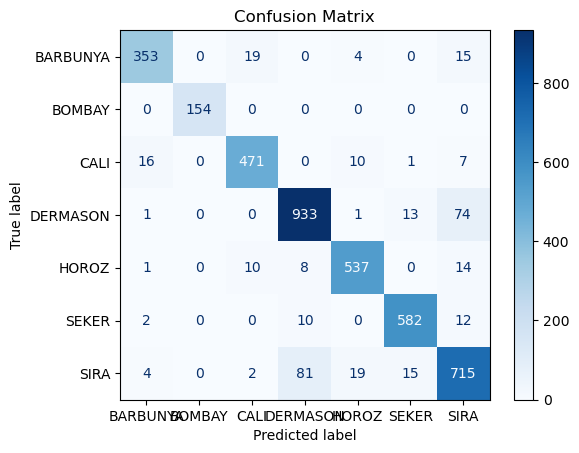

In [ ]:
#adding features (without elongation)

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)])
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model
def train_logistic_regression(X, y, num_classes, lr=0.1, epochs=3000):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))  # Initialize weights
    b = np.zeros(num_classes)               # Initialize biases

    for epoch in range(epochs):
        # Forward pass
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute loss
        loss = cross_entropy_loss(y, y_pred)

        # Backward pass (compute gradients)
        grad_w, grad_b = compute_gradients(X, y, y_pred)

        # Update weights and biases
        W -= lr * grad_w
        b -= lr * grad_b

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W, b

# Predict function
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Example usage
if __name__ == "__main__":
    # Load your dataset here
    # Assuming the dataset is a CSV file with the last column as the target
    import pandas as pd
    data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
    data = shuffle(data, random_state=42)  # Shuffling the dataset
    features = list(data.drop(data.columns[-1], axis=1).columns)  # Assuming the last column is the target
    data["FlatSymmetry"] = data["AspectRation"] * data["Extent"]
    data["KidneyScore"] = (1 - data["ShapeFactor4"]) * data["EquivDiameter"]
    data["TextureHint"] = data["Solidity"] * data["Compactness"]
    # all_features = features + ["Elongation", "FlatSymmetry", "KidneyScore", "TextureHint"]

    target_col = "Class"
    # 先分离目标变量
    y = data[target_col]
    X = data.drop(columns=[target_col])
    # pd.get_dummies 会将所有非数值型列转换为数值型虚拟变量
    X = pd.get_dummies(X, drop_first=True)

    # 现在 X 中的所有特征都是数值型，可以继续归一化处理
    X = (X - X.mean()) / X.std()

    # X = data.iloc[:, :-1].values  # Assuming the last column is the target
    # y = data.iloc[:, -1].values
    # Preprocess the data
    # X = data[all_features].values  # 如果目标列不是最后一列，请相应调整
    # y = data.iloc[:, -1].values

    # Normalize features
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # Convert labels to integers (if not already)
    classes = np.unique(y)
    y = np.array([np.where(classes == label)[0][0] for label in y])

    # One-hot encode the labels
    y_encoded = one_hot_encode(y, num_classes=len(classes))

    # Split into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

    # Train the model
    W, b = train_logistic_regression(X_train, y_train, num_classes=len(classes))

    # Test the model
    y_pred = predict(X_test, W, b)
    y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot back to labels
    accuracy = np.mean(y_pred == y_test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # result accuracy improves from around 88% to 92% when increasing the learning rate from 0.01 to 0.1 and adding the epochs from 1000 to 3000

Starting grid search over hyperparameters...

Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.1640
Epoch 200, Loss: 0.9462
Epoch 300, Loss: 0.8321
Epoch 400, Loss: 0.7561
Epoch 500, Loss: 0.6995
Epoch 600, Loss: 0.6547
Epoch 700, Loss: 0.6180
Epoch 800, Loss: 0.5871
Epoch 900, Loss: 0.5607
lr: 0.01, epochs: 1000 => Validation Accuracy: 88.41%
Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.1640
Epoch 200, Loss: 0.9462
Epoch 300, Loss: 0.8321
Epoch 400, Loss: 0.7561
Epoch 500, Loss: 0.6995
Epoch 600, Loss: 0.6547
Epoch 700, Loss: 0.6180
Epoch 800, Loss: 0.5871
Epoch 900, Loss: 0.5607
Epoch 1000, Loss: 0.5379
Epoch 1100, Loss: 0.5178
Epoch 1200, Loss: 0.5001
Epoch 1300, Loss: 0.4843
Epoch 1400, Loss: 0.4701
Epoch 1500, Loss: 0.4573
Epoch 1600, Loss: 0.4456
Epoch 1700, Loss: 0.4350
Epoch 1800, Loss: 0.4253
Epoch 1900, Loss: 0.4164
Epoch 2000, Loss: 0.4081
Epoch 2100, Loss: 0.4005
Epoch 2200, Loss: 0.3934
Epoch 2300, Loss: 0.3869
Epoch 2400, Loss: 0.3807
Epoch 2500, Loss: 0.3750
Epoch 2600, Loss: 0.3696

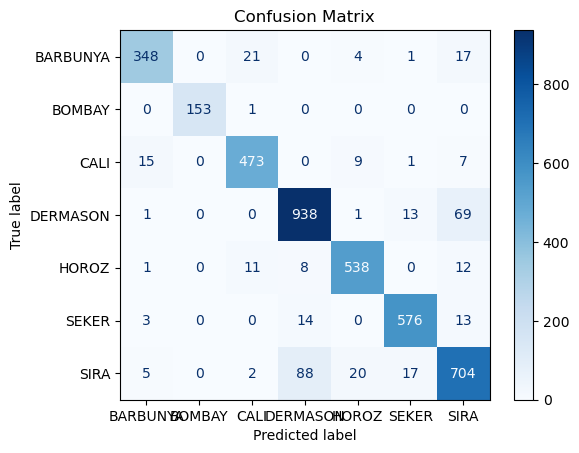

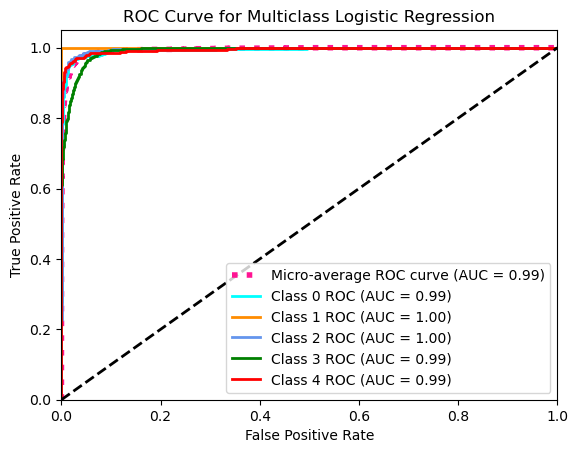

Overall ROC AUC (macro-average): 0.99


In [6]:
#add features(without elongation)  complete version
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_curve, auc, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)] + 1e-15)
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model given hyperparameters
def train_logistic_regression(X, y, num_classes, lr, epochs):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))
    b = np.zeros(num_classes)
    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y, y_pred)
        grad_w, grad_b = compute_gradients(X, y, y_pred)
        W -= lr * grad_w
        b -= lr * grad_b
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W, b

# Predict class labels
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Predict probabilities
def predict_proba(X, W, b):
    logits = np.dot(X, W) + b
    return softmax(logits)


data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
data = shuffle(data, random_state=42)  # Shuffling the dataset
features = list(data.drop(data.columns[-1], axis=1).columns)  # Assuming the last column is the target
data["FlatSymmetry"] = data["AspectRation"] * data["Extent"]
data["KidneyScore"] = (1 - data["ShapeFactor4"]) * data["EquivDiameter"]
data["TextureHint"] = data["Solidity"] * data["Compactness"]
# all_features = features + ["Elongation", "FlatSymmetry", "KidneyScore", "TextureHint"]

target_col = "Class"
# 先分离目标变量
y = data[target_col]
X = data.drop(columns=[target_col])
# pd.get_dummies 会将所有非数值型列转换为数值型虚拟变量
X = pd.get_dummies(X, drop_first=True)

# 现在 X 中的所有特征都是数值型，可以继续归一化处理
X = (X - X.mean()) / X.std()

# X = data.iloc[:, :-1].values  # Assuming the last column is the target
# y = data.iloc[:, -1].values
# Preprocess the data
# X = data[all_features].values  # 如果目标列不是最后一列，请相应调整
# y = data.iloc[:, -1].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)



# Convert labels to integers and one-hot encode them
classes = np.unique(y)
y_int = np.array([np.where(classes == label)[0][0] for label in y])
y_encoded = one_hot_encode(y_int, num_classes=len(classes))

# Split data into training+validation and test sets; further split training+validation into train and validation
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Grid search over hyperparameters
learning_rates = [0.01, 0.1, 0.5]
epochs_list = [1000, 3000, 5000]
best_val_accuracy = 0
best_params = None
best_W = None
best_b = None

print("Starting grid search over hyperparameters...\n")
for lr in learning_rates:
    for epochs in epochs_list:
        W_temp, b_temp = train_logistic_regression(X_train, y_train, num_classes=len(classes), lr=lr, epochs=epochs)
        y_val_pred = predict(X_val, W_temp, b_temp)
        y_val_labels = np.argmax(y_val, axis=1)
        acc = np.mean(y_val_pred == y_val_labels)
        print(f"lr: {lr}, epochs: {epochs} => Validation Accuracy: {acc*100:.2f}%")
        if acc > best_val_accuracy:
            best_val_accuracy = acc
            best_params = (lr, epochs)
            best_W, best_b = W_temp, b_temp

print(f"\nBest hyperparameters: Learning Rate: {best_params[0]}, Epochs: {best_params[1]}, Accuracy: {best_val_accuracy*100:.2f}%")

# Optionally retrain on full training+validation set using the best hyperparameters
W_final, b_final = train_logistic_regression(X_train_val, y_train_val, num_classes=len(classes),
                                               lr=best_params[0], epochs=best_params[1])

# Evaluate model on training, test, and whole datasets using best_W and best_b from grid search
y_train_pred = predict(X_train, best_W, best_b)
train_acc = np.mean(y_train_pred == np.argmax(y_train, axis=1))
print(f"Training Accuracy: {train_acc*100:.2f}%")

y_test_pred = predict(X_test, best_W, best_b)
test_acc = np.mean(y_test_pred == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {test_acc*100:.2f}%")

X_whole = np.concatenate((X_train, X_test), axis=0)
y_whole = np.concatenate((y_train, y_test), axis=0)
whole_acc = np.mean(predict(X_whole, best_W, best_b) == np.argmax(y_whole, axis=1))
print(f"Whole Dataset Accuracy: {whole_acc*100:.2f}%")

# Evaluate classification metrics on test set using retrained model (W_final, b_final)
y_test_pred = predict(X_test, W_final, b_final)
y_test_true = np.argmax(y_test, axis=1)
y_pred_proba = predict_proba(X_test, W_final, b_final)

print("\nClassification Metrics on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_true, y_test_pred)*100))
print("Precision: {:.2f}".format(precision_score(y_test_true, y_test_pred, average='macro')))
print("Recall: {:.2f}".format(recall_score(y_test_true, y_test_pred, average='macro')))
print("F1 Score: {:.2f}".format(f1_score(y_test_true, y_test_pred, average='macro')))
print("\nClassification Report:\n", classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curves (one-vs-all approach) and compute AUC
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc='lower right')
plt.show()

overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro")
print("Overall ROC AUC (macro-average): {:.2f}".format(overall_auc))

Epoch 0, Loss: 1.9459101490553143
Epoch 100, Loss: 0.7222613509107186
Epoch 200, Loss: 0.55439316557138
Epoch 300, Loss: 0.47631130639478236
Epoch 400, Loss: 0.43060598064383154
Epoch 500, Loss: 0.4003727201655075
Epoch 600, Loss: 0.378790373439643
Epoch 700, Loss: 0.3625611122550376
Epoch 800, Loss: 0.3498872137544245
Epoch 900, Loss: 0.3397012941935584
Epoch 1000, Loss: 0.33132777083287845
Epoch 1100, Loss: 0.3243172747739481
Epoch 1200, Loss: 0.3183587932790101
Epoch 1300, Loss: 0.31322995678664045
Epoch 1400, Loss: 0.30876740259780494
Epoch 1500, Loss: 0.3048483268648991
Epoch 1600, Loss: 0.30137857526327616
Epoch 1700, Loss: 0.29828471186995653
Epoch 1800, Loss: 0.29550859337579655
Epoch 1900, Loss: 0.29300356898962227
Epoch 2000, Loss: 0.2907317632583066
Epoch 2100, Loss: 0.28866209714835755
Epoch 2200, Loss: 0.2867688229128313
Epoch 2300, Loss: 0.28503042319250865
Epoch 2400, Loss: 0.2834287726709548
Epoch 2500, Loss: 0.28194849186959875
Epoch 2600, Loss: 0.2805764435013861
Epoc

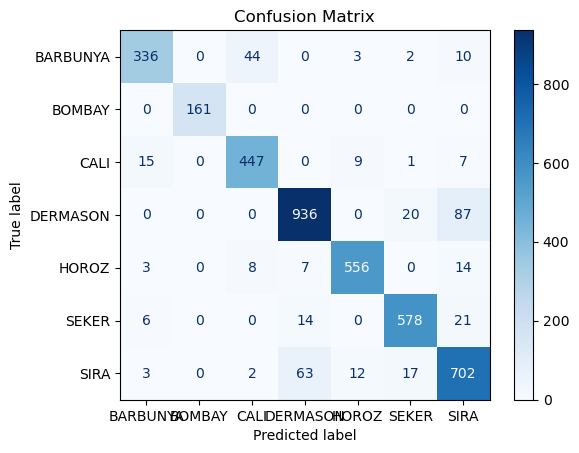

In [13]:
#deleting features 

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)])
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model
def train_logistic_regression(X, y, num_classes, lr=0.1, epochs=3000):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))  # Initialize weights
    b = np.zeros(num_classes)               # Initialize biases

    for epoch in range(epochs):
        # Forward pass
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute loss
        loss = cross_entropy_loss(y, y_pred)

        # Backward pass (compute gradients)
        grad_w, grad_b = compute_gradients(X, y, y_pred)

        # Update weights and biases
        W -= lr * grad_w
        b -= lr * grad_b

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W, b

# Predict function
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Example usage
if __name__ == "__main__":
    # Load your dataset here
    # Assuming the dataset is a CSV file with the last column as the target
    import pandas as pd
    data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
    drop_columns = [
    'ShapeFactor2', 'Compactness', 'Solidity', 'EquivDiameter',
    'Extent', 'ConvexArea', 'Area', 'Eccentricity', 'ShapeFactor4', 'Perimeter']
    data.drop(columns=drop_columns, inplace=True)
    X = data.iloc[:, :-1].values  # Assuming the last column is the target
    y = data.iloc[:, -1].values

  

    # Normalize features
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # Convert labels to integers (if not already)
    classes = np.unique(y)
    y = np.array([np.where(classes == label)[0][0] for label in y])

    # One-hot encode the labels
    y_encoded = one_hot_encode(y, num_classes=len(classes))

    # Split into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

    # Train the model
    W, b = train_logistic_regression(X_train, y_train, num_classes=len(classes))

    # Test the model
    y_pred = predict(X_test, W, b)
    y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot back to labels
    accuracy = np.mean(y_pred == y_test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # result accuracy improves from around 88% to 92% when increasing the learning rate from 0.01 to 0.1 and adding the epochs from 1000 to 3000

Starting grid search over hyperparameters...

Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.4670
Epoch 200, Loss: 1.2283
Epoch 300, Loss: 1.0885
Epoch 400, Loss: 0.9946
Epoch 500, Loss: 0.9252
Epoch 600, Loss: 0.8706
Epoch 700, Loss: 0.8257
Epoch 800, Loss: 0.7878
Epoch 900, Loss: 0.7552
lr: 0.01, epochs: 1000 => Validation Accuracy: 84.58%
Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.4670
Epoch 200, Loss: 1.2283
Epoch 300, Loss: 1.0885
Epoch 400, Loss: 0.9946
Epoch 500, Loss: 0.9252
Epoch 600, Loss: 0.8706
Epoch 700, Loss: 0.8257
Epoch 800, Loss: 0.7878
Epoch 900, Loss: 0.7552
Epoch 1000, Loss: 0.7267
Epoch 1100, Loss: 0.7015
Epoch 1200, Loss: 0.6790
Epoch 1300, Loss: 0.6589
Epoch 1400, Loss: 0.6406
Epoch 1500, Loss: 0.6240
Epoch 1600, Loss: 0.6089
Epoch 1700, Loss: 0.5950
Epoch 1800, Loss: 0.5822
Epoch 1900, Loss: 0.5703
Epoch 2000, Loss: 0.5594
Epoch 2100, Loss: 0.5492
Epoch 2200, Loss: 0.5397
Epoch 2300, Loss: 0.5308
Epoch 2400, Loss: 0.5225
Epoch 2500, Loss: 0.5146
Epoch 2600, Loss: 0.5073

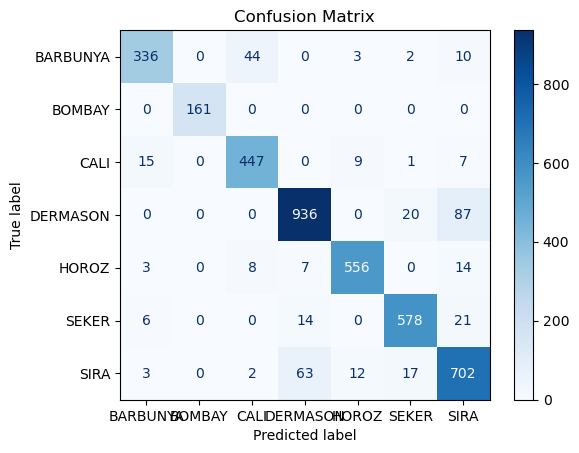

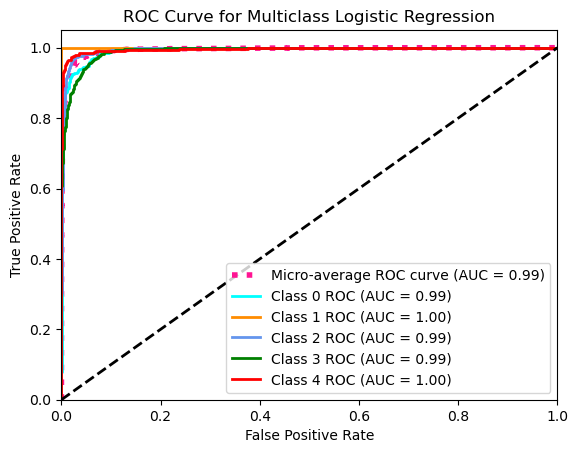

Overall ROC AUC (macro-average): 0.99


In [7]:
#deleting features  complete version
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_curve, auc, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)] + 1e-15)
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model given hyperparameters
def train_logistic_regression(X, y, num_classes, lr, epochs):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))
    b = np.zeros(num_classes)
    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y, y_pred)
        grad_w, grad_b = compute_gradients(X, y, y_pred)
        W -= lr * grad_w
        b -= lr * grad_b
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W, b

# Predict class labels
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Predict probabilities
def predict_proba(X, W, b):
    logits = np.dot(X, W) + b
    return softmax(logits)

data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
drop_columns = [
'ShapeFactor2', 'Compactness', 'Solidity', 'EquivDiameter',
'Extent', 'ConvexArea', 'Area', 'Eccentricity', 'ShapeFactor4', 'Perimeter']
data.drop(columns=drop_columns, inplace=True)
X = data.iloc[:, :-1].values  # Assuming the last column is the target
y = data.iloc[:, -1].values

# X = data.iloc[:, :-1].values  # Assuming the last column is the target
# y = data.iloc[:, -1].values
# Preprocess the data
# X = data[all_features].values  # 如果目标列不是最后一列，请相应调整
# y = data.iloc[:, -1].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)



# Convert labels to integers and one-hot encode them
classes = np.unique(y)
y_int = np.array([np.where(classes == label)[0][0] for label in y])
y_encoded = one_hot_encode(y_int, num_classes=len(classes))

# Split data into training+validation and test sets; further split training+validation into train and validation
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Grid search over hyperparameters
learning_rates = [0.01, 0.1, 0.5]
epochs_list = [1000, 3000, 5000]
best_val_accuracy = 0
best_params = None
best_W = None
best_b = None

print("Starting grid search over hyperparameters...\n")
for lr in learning_rates:
    for epochs in epochs_list:
        W_temp, b_temp = train_logistic_regression(X_train, y_train, num_classes=len(classes), lr=lr, epochs=epochs)
        y_val_pred = predict(X_val, W_temp, b_temp)
        y_val_labels = np.argmax(y_val, axis=1)
        acc = np.mean(y_val_pred == y_val_labels)
        print(f"lr: {lr}, epochs: {epochs} => Validation Accuracy: {acc*100:.2f}%")
        if acc > best_val_accuracy:
            best_val_accuracy = acc
            best_params = (lr, epochs)
            best_W, best_b = W_temp, b_temp

print(f"\nBest hyperparameters: Learning Rate: {best_params[0]}, Epochs: {best_params[1]}, Accuracy: {best_val_accuracy*100:.2f}%")

# Optionally retrain on full training+validation set using the best hyperparameters
W_final, b_final = train_logistic_regression(X_train_val, y_train_val, num_classes=len(classes),
                                               lr=best_params[0], epochs=best_params[1])

# Evaluate model on training, test, and whole datasets using best_W and best_b from grid search
y_train_pred = predict(X_train, best_W, best_b)
train_acc = np.mean(y_train_pred == np.argmax(y_train, axis=1))
print(f"Training Accuracy: {train_acc*100:.2f}%")

y_test_pred = predict(X_test, best_W, best_b)
test_acc = np.mean(y_test_pred == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {test_acc*100:.2f}%")

X_whole = np.concatenate((X_train, X_test), axis=0)
y_whole = np.concatenate((y_train, y_test), axis=0)
whole_acc = np.mean(predict(X_whole, best_W, best_b) == np.argmax(y_whole, axis=1))
print(f"Whole Dataset Accuracy: {whole_acc*100:.2f}%")

# Evaluate classification metrics on test set using retrained model (W_final, b_final)
y_test_pred = predict(X_test, W_final, b_final)
y_test_true = np.argmax(y_test, axis=1)
y_pred_proba = predict_proba(X_test, W_final, b_final)

print("\nClassification Metrics on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_true, y_test_pred)*100))
print("Precision: {:.2f}".format(precision_score(y_test_true, y_test_pred, average='macro')))
print("Recall: {:.2f}".format(recall_score(y_test_true, y_test_pred, average='macro')))
print("F1 Score: {:.2f}".format(f1_score(y_test_true, y_test_pred, average='macro')))
print("\nClassification Report:\n", classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curves (one-vs-all approach) and compute AUC
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc='lower right')
plt.show()

overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro")
print("Overall ROC AUC (macro-average): {:.2f}".format(overall_auc))

Epoch 0, Loss: 1.9459101490553143
Epoch 100, Loss: 0.6258986355816661
Epoch 200, Loss: 0.4697160255698998
Epoch 300, Loss: 0.40095737407064586
Epoch 400, Loss: 0.36220296336897617
Epoch 500, Loss: 0.3372433911309407
Epoch 600, Loss: 0.31978400873417157
Epoch 700, Loss: 0.30686578872169606
Epoch 800, Loss: 0.29691076447780035
Epoch 900, Loss: 0.28899884510231216
Epoch 1000, Loss: 0.2825565535902259
Epoch 1100, Loss: 0.27720746774930427
Epoch 1200, Loss: 0.27269407089575853
Epoch 1300, Loss: 0.26883412262551054
Epoch 1400, Loss: 0.2654949591980504
Epoch 1500, Loss: 0.2625776677487753
Epoch 1600, Loss: 0.26000696929546885
Epoch 1700, Loss: 0.25772454118728294
Epoch 1800, Loss: 0.25568448623500073
Epoch 1900, Loss: 0.253850183333971
Epoch 2000, Loss: 0.2521920513164719
Epoch 2100, Loss: 0.250685930965723
Epoch 2200, Loss: 0.24931189437827303
Epoch 2300, Loss: 0.2480533553950475
Epoch 2400, Loss: 0.24689639577760275
Epoch 2500, Loss: 0.2458292483893232
Epoch 2600, Loss: 0.24484189624938624


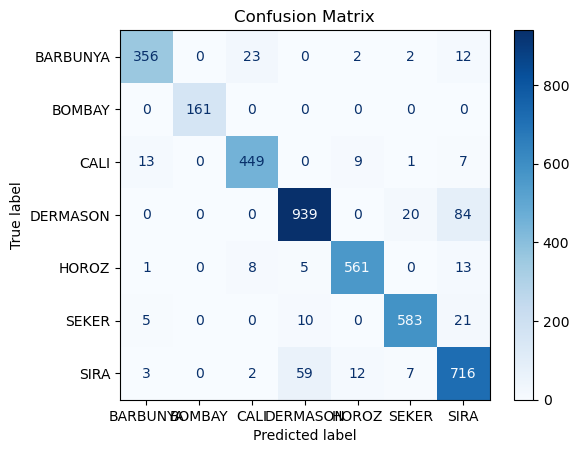

In [15]:
#same features as jiaqi


import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)])
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model
def train_logistic_regression(X, y, num_classes, lr=0.1, epochs=3000):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))  # Initialize weights
    b = np.zeros(num_classes)               # Initialize biases

    for epoch in range(epochs):
        # Forward pass
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute loss
        loss = cross_entropy_loss(y, y_pred)

        # Backward pass (compute gradients)
        grad_w, grad_b = compute_gradients(X, y, y_pred)

        # Update weights and biases
        W -= lr * grad_w
        b -= lr * grad_b

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W, b

# Predict function
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Example usage
if __name__ == "__main__":
    # Load your dataset here
    # Assuming the dataset is a CSV file with the last column as the target
    import pandas as pd
    data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
    data['SF1_x_SF3'] = data['ShapeFactor1'] * data['ShapeFactor3']
    data['SF2_squared'] = data['ShapeFactor2'] ** 2
    data['SF4_log'] = np.log(data['ShapeFactor4'].abs() + 1e-6)  # 防止零值

    drop_columns = [
    'ShapeFactor2', 'Compactness', 'Solidity', 'EquivDiameter',
    'Extent', 'ConvexArea', 'Area', 'Eccentricity', 'ShapeFactor4']
    data.drop(columns=drop_columns, inplace=True)
    target_col = "Class"
    # 先分离目标变量
    y = data[target_col]
    X = data.drop(columns=[target_col])
    # pd.get_dummies 会将所有非数值型列转换为数值型虚拟变量
    X = pd.get_dummies(X, drop_first=True)

    # 现在 X 中的所有特征都是数值型，可以继续归一化处理
    X = (X - X.mean()) / X.std()

    # Convert labels to integers (if not already)
    classes = np.unique(y)
    y = np.array([np.where(classes == label)[0][0] for label in y])

    # One-hot encode the labels
    y_encoded = one_hot_encode(y, num_classes=len(classes))

    # Split into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

    # Train the model
    W, b = train_logistic_regression(X_train, y_train, num_classes=len(classes))

    # Test the model
    y_pred = predict(X_test, W, b)
    y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot back to labels
    accuracy = np.mean(y_pred == y_test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # result accuracy improves from around 88% to 92% when increasing the learning rate from 0.01 to 0.1 and adding the epochs from 1000 to 3000

Starting grid search over hyperparameters...

Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.3345
Epoch 200, Loss: 1.1026
Epoch 300, Loss: 0.9737
Epoch 400, Loss: 0.8866
Epoch 500, Loss: 0.8213
Epoch 600, Loss: 0.7693
Epoch 700, Loss: 0.7264
Epoch 800, Loss: 0.6901
Epoch 900, Loss: 0.6589
lr: 0.01, epochs: 1000 => Validation Accuracy: 89.56%
Epoch 0, Loss: 1.9459
Epoch 100, Loss: 1.3345
Epoch 200, Loss: 1.1026
Epoch 300, Loss: 0.9737
Epoch 400, Loss: 0.8866
Epoch 500, Loss: 0.8213
Epoch 600, Loss: 0.7693
Epoch 700, Loss: 0.7264
Epoch 800, Loss: 0.6901
Epoch 900, Loss: 0.6589
Epoch 1000, Loss: 0.6317
Epoch 1100, Loss: 0.6077
Epoch 1200, Loss: 0.5865
Epoch 1300, Loss: 0.5675
Epoch 1400, Loss: 0.5504
Epoch 1500, Loss: 0.5350
Epoch 1600, Loss: 0.5210
Epoch 1700, Loss: 0.5082
Epoch 1800, Loss: 0.4965
Epoch 1900, Loss: 0.4857
Epoch 2000, Loss: 0.4758
Epoch 2100, Loss: 0.4667
Epoch 2200, Loss: 0.4582
Epoch 2300, Loss: 0.4503
Epoch 2400, Loss: 0.4429
Epoch 2500, Loss: 0.4360
Epoch 2600, Loss: 0.4295

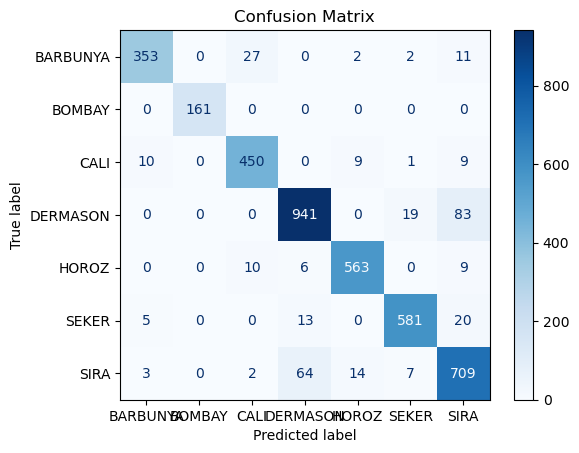

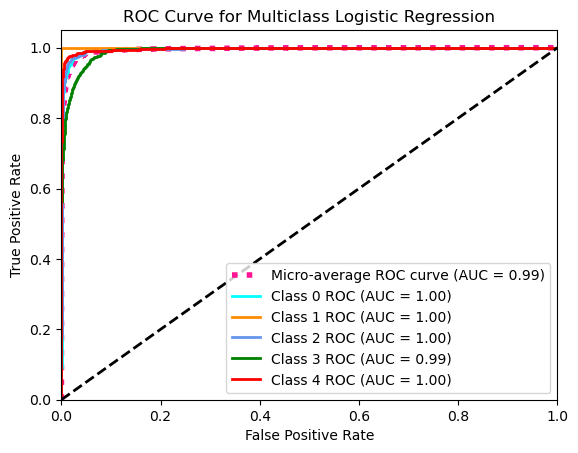

Overall ROC AUC (macro-average): 0.99


In [8]:
#same features with jiaqi complete version
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_curve, auc, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Softmax function for multiclass predictions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)] + 1e-15)
    return np.sum(logp) / n_samples

# Gradient calculation
def compute_gradients(X, y_true, y_pred):
    n_samples = X.shape[0]
    grad_w = np.dot(X.T, (y_pred - y_true)) / n_samples
    grad_b = np.sum(y_pred - y_true, axis=0) / n_samples
    return grad_w, grad_b

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Train logistic regression model given hyperparameters
def train_logistic_regression(X, y, num_classes, lr, epochs):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, num_classes))
    b = np.zeros(num_classes)
    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y, y_pred)
        grad_w, grad_b = compute_gradients(X, y, y_pred)
        W -= lr * grad_w
        b -= lr * grad_b
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return W, b

# Predict class labels
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Predict probabilities
def predict_proba(X, W, b):
    logits = np.dot(X, W) + b
    return softmax(logits)

data = pd.read_csv("Dry_Bean_Dataset.csv")  # Replace with your dataset path
data['SF1_x_SF3'] = data['ShapeFactor1'] * data['ShapeFactor3']
data['SF2_squared'] = data['ShapeFactor2'] ** 2
data['SF4_log'] = np.log(data['ShapeFactor4'].abs() + 1e-6)  # 防止零值

drop_columns = [
'ShapeFactor2', 'Compactness', 'Solidity', 'EquivDiameter',
'Extent', 'ConvexArea', 'Area', 'Eccentricity', 'ShapeFactor4']
data.drop(columns=drop_columns, inplace=True)
target_col = "Class"
# 先分离目标变量
y = data[target_col]
X = data.drop(columns=[target_col])
# pd.get_dummies 会将所有非数值型列转换为数值型虚拟变量
X = pd.get_dummies(X, drop_first=True)

# 现在 X 中的所有特征都是数值型，可以继续归一化处理
X = (X - X.mean()) / X.std()



# Convert labels to integers and one-hot encode them
classes = np.unique(y)
y_int = np.array([np.where(classes == label)[0][0] for label in y])
y_encoded = one_hot_encode(y_int, num_classes=len(classes))

# Split data into training+validation and test sets; further split training+validation into train and validation
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Grid search over hyperparameters
learning_rates = [0.01, 0.1, 0.5]
epochs_list = [1000, 3000, 5000]
best_val_accuracy = 0
best_params = None
best_W = None
best_b = None

print("Starting grid search over hyperparameters...\n")
for lr in learning_rates:
    for epochs in epochs_list:
        W_temp, b_temp = train_logistic_regression(X_train, y_train, num_classes=len(classes), lr=lr, epochs=epochs)
        y_val_pred = predict(X_val, W_temp, b_temp)
        y_val_labels = np.argmax(y_val, axis=1)
        acc = np.mean(y_val_pred == y_val_labels)
        print(f"lr: {lr}, epochs: {epochs} => Validation Accuracy: {acc*100:.2f}%")
        if acc > best_val_accuracy:
            best_val_accuracy = acc
            best_params = (lr, epochs)
            best_W, best_b = W_temp, b_temp

print(f"\nBest hyperparameters: Learning Rate: {best_params[0]}, Epochs: {best_params[1]}, Accuracy: {best_val_accuracy*100:.2f}%")

# Optionally retrain on full training+validation set using the best hyperparameters
W_final, b_final = train_logistic_regression(X_train_val, y_train_val, num_classes=len(classes),
                                               lr=best_params[0], epochs=best_params[1])

# Evaluate model on training, test, and whole datasets using best_W and best_b from grid search
y_train_pred = predict(X_train, best_W, best_b)
train_acc = np.mean(y_train_pred == np.argmax(y_train, axis=1))
print(f"Training Accuracy: {train_acc*100:.2f}%")

y_test_pred = predict(X_test, best_W, best_b)
test_acc = np.mean(y_test_pred == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {test_acc*100:.2f}%")

X_whole = np.concatenate((X_train, X_test), axis=0)
y_whole = np.concatenate((y_train, y_test), axis=0)
whole_acc = np.mean(predict(X_whole, best_W, best_b) == np.argmax(y_whole, axis=1))
print(f"Whole Dataset Accuracy: {whole_acc*100:.2f}%")

# Evaluate classification metrics on test set using retrained model (W_final, b_final)
y_test_pred = predict(X_test, W_final, b_final)
y_test_true = np.argmax(y_test, axis=1)
y_pred_proba = predict_proba(X_test, W_final, b_final)

print("\nClassification Metrics on Test Set:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_true, y_test_pred)*100))
print("Precision: {:.2f}".format(precision_score(y_test_true, y_test_pred, average='macro')))
print("Recall: {:.2f}".format(recall_score(y_test_true, y_test_pred, average='macro')))
print("F1 Score: {:.2f}".format(f1_score(y_test_true, y_test_pred, average='macro')))
print("\nClassification Report:\n", classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curves (one-vs-all approach) and compute AUC
n_classes = y_test.shape[1]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc='lower right')
plt.show()

overall_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro")
print("Overall ROC AUC (macro-average): {:.2f}".format(overall_auc))

Iteration 0 loss: 1.9459
Iteration 50 loss: 0.7892
Iteration 100 loss: 0.6579
Iteration 150 loss: 0.5903
Iteration 200 loss: 0.5457
Iteration 250 loss: 0.5129
Iteration 300 loss: 0.4873
Iteration 350 loss: 0.4664
Iteration 400 loss: 0.4488
Iteration 450 loss: 0.4338
Iteration 500 loss: 0.4207
Iteration 550 loss: 0.4091
Iteration 600 loss: 0.3988
Iteration 650 loss: 0.3895
Iteration 700 loss: 0.3811
Iteration 750 loss: 0.3735
Iteration 800 loss: 0.3665
Iteration 850 loss: 0.3601
Iteration 900 loss: 0.3541
Iteration 950 loss: 0.3487
Iteration 1000 loss: 0.3436
Iteration 1050 loss: 0.3388
Iteration 1100 loss: 0.3344
Iteration 1150 loss: 0.3302
Iteration 1200 loss: 0.3263
Iteration 1250 loss: 0.3226
Iteration 1300 loss: 0.3192
Iteration 1350 loss: 0.3159
Iteration 1400 loss: 0.3128
Iteration 1450 loss: 0.3099
Iteration 1500 loss: 0.3071
Iteration 1550 loss: 0.3045
Iteration 1600 loss: 0.3019
Iteration 1650 loss: 0.2996
Iteration 1700 loss: 0.2973
Iteration 1750 loss: 0.2951
Iteration 1800 

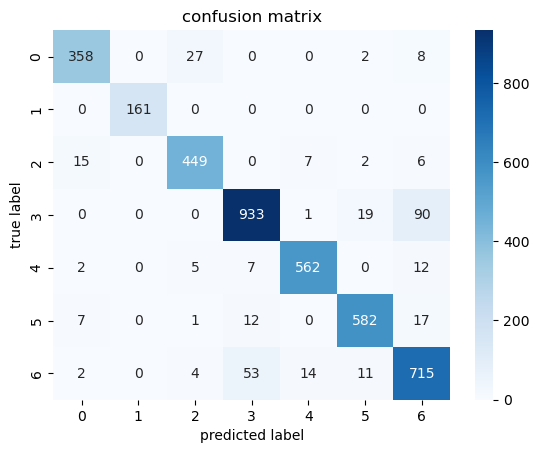

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv("Dry_Bean_Dataset.csv")
X = data.iloc[:, :-1].values  # 特征
y = data.iloc[:, -1].values   # 标签

# with and without huge difference!
# mean = X.mean(axis=0)
# std = X.std(axis=0)
# X = (X - mean) / std

# 将类别标签转换成数字编码
classes = np.unique(y)
num_classes = len(classes)
label_to_index = {label: idx for idx, label in enumerate(classes)}
y_encoded = np.vectorize(lambda label: label_to_index[label])(y)

# 划分训练集和测试集
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


# 初始化参数，显式区分权重和截距（偏置）
n_features = X_train.shape[1]
W = np.zeros((n_features, num_classes))  # 权重
b = np.zeros((1, num_classes))            # 截距

# 定义 softmax 函数，按照公式：
# Pr(y=c|x) = exp(b[c] + x·W[:, c]) / sum(exp(b[j] + x·W[:, j]))
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)  # 数值稳定性处理
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# One-hot 编码标签
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

y_train_onehot = one_hot_encode(y_train_encoded, num_classes)

learning_rate = 0.1
num_iterations = 10000

# 使用梯度下降训练多分类 Logistic Regression
# 公式应用：scores = x·W + b
for i in range(num_iterations):
    # 计算得分并得到各类别的概率（应用公式中的 exp(b + x·W)）
    scores = np.dot(X_train, W) + b
    probs = softmax(scores)
    
    # 交叉熵损失： L = -1/N * sum[ y_onehot * log(prob) ]
    loss = -np.mean(np.sum(y_train_onehot * np.log(probs + 1e-8), axis=1))
    # 计算梯度
    grad = np.dot(X_train.T, (probs - y_train_onehot)) / X_train.shape[0]
    W -= learning_rate * grad
    if i % 50 == 0:
        print(f"Iteration {i} loss: {loss:.4f}")

# 定义预测函数
def predict(X, W):
    scores = np.dot(X, W)
    probs = softmax(scores)
    return np.argmax(probs, axis=1)

train_predictions = predict(X_train, W)
test_predictions = predict(X_test, W)

# 模型评估
print("训练集准确率:", accuracy_score(y_train_encoded, train_predictions))
print("测试集准确率:", accuracy_score(y_test_encoded, test_predictions))
print("\n测试集分类报告:\n", classification_report(y_test_encoded, test_predictions, target_names=[str(c) for c in classes]))

# 绘制混淆矩阵
cm = confusion_matrix(y_test_encoded, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('confusion matrix')
plt.show()
# the main difference between this code and the previous one is that this one doesn't have the normalization step.